# **Lab 4: Basic text preprocessing and topic modeling**

>`The goal of this assignment is to get familiar with textual data analysis.`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import needed libraries. E.g., pandas, sklearn, nltk, etc. 
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns                       #visualisation
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
%matplotlib inline

import pickle
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re 
import nltk 
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk. tokenize import word_tokenize 
from nltk.corpus import stopwords 
from nltk. stem import WordNetLemmatizer

# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings 
warnings.filterwarnings('ignore')

### **Task 1**

>`The given dataset is a table containing questions about R on StackOverflow site. Your first task is to perform standard text prepossessing steps introduced in lectures for future tasks. You can perform analysis on title or body of the questions.`

In [ ]:
# TODO code for task 1
df=pd.read_csv('/content/drive/MyDrive/Questions.csv/Questions.csv')
df.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,77434,14008.0,2008-09-16T21:40:29Z,171,How to access the last value in a vector?,<p>Suppose I have a vector that is nested in a...
1,79709,NaN,2008-09-17T03:39:16Z,3,Worse sin: side effects or passing massive obj...,<p>I have a function inside a loop inside a fu...
2,95007,15842.0,2008-09-18T17:59:19Z,56,Explain the quantile() function in R,<p>I've been mystified by the R quantile funct...
3,103312,NaN,2008-09-19T16:09:26Z,4,How to test for the EOF flag in R?,<p>How can I test for the <code>EOF</code> fla...
4,255697,1941213.0,2008-11-01T15:48:30Z,4,Is there an R package for learning a Dirichlet...,<p>I'm looking for a an <code>R</code> package...


## <a>**EDA**

> basic data exploration includes 

In [ ]:
#data info
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189930 entries, 0 to 189929
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            189930 non-null  int64  
 1   OwnerUserId   188729 non-null  float64
 2   CreationDate  189930 non-null  object 
 3   Score         189930 non-null  int64  
 4   Title         189930 non-null  object 
 5   Body          189930 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.7+ MB


> the types of data are float , int and object

In [ ]:
# Let's check if we have nan values in the dataset.
df.isnull().sum()

Id                 0
OwnerUserId     1201
CreationDate       0
Score              0
Title              0
Body               0
dtype: int64

In [ ]:
#i will drop nan from  owneruserId
df = df.dropna(subset=['OwnerUserId'])
df.isnull().sum()

Id              0
OwnerUserId     0
CreationDate    0
Score           0
Title           0
Body            0
dtype: int64

In [ ]:
# let's check if we have duplicate 
df.duplicated(subset=None).sum()

0

In [ ]:
df.duplicated().unique() #returns a list of unique values

array([False])

**Preprocess Data**

*  `Remove special characters from title and body`
*  `Convert characters to lowercase`
*  `Remove HTML tags`
*  `Lemmatize the words`
*  `Remove stop words`
*  `Tokenization`
*  `Removing Numbers and Punctuation`

In [ ]:
# nltk packages
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
token = ToktokTokenizer()
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [ ]:
# let's remove whitespaces from string elements
def strip_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [ ]:
# let's remove stop words
def removeStopWords(text):
    #Convert to lower case
    text = text.lower()
    words = token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

In [ ]:
# remove punctuation 
def removePunctuation(text):
    # to remove any links
    # specifically to clean the body column from any links
    re_url = re.compile(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
    text = re.sub(re_url, '', text)
    punct = '!"$%&\'()*,./:;<=>?@[\\]^_`{|}~-'
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
      punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [ ]:
# lemmatization function.
def lemmatizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x.lower())
    return ' '.join(map(str, listLemma))

In [ ]:
# let's apply functions to clean title of data 
df['Title'] = df['Title'].apply(lambda x: str(x)) 
df['Title'] = df['Title'].apply(lambda x: removeStopWords(x)) 
df['Title'] = df['Title'].apply(lambda x: removePunctuation(x)) 
df['Title'] = df['Title'].apply(lambda x: lemmatizeWords(x)) 
df['Title']

0                                  access last value vector
2                               explain quantile function r
4                r package learn dirichlet prior count data
5                                    optimization package r
6                                           think vectors r
                                ...                        
189925             get command httr return anything minutes
189926        rshiny discrete value supply continuous scale
189927    confidence interval quantile regression use bo...
189928               time lag analysis list impute datasets
189929    conditionally format text shiny give lookup he...
Name: Title, Length: 188729, dtype: object

In [ ]:
df.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,77434,14008.0,2008-09-16T21:40:29Z,171,access last value vector,<p>Suppose I have a vector that is nested in a...
2,95007,15842.0,2008-09-18T17:59:19Z,56,explain quantile function r,<p>I've been mystified by the R quantile funct...
4,255697,1941213.0,2008-11-01T15:48:30Z,4,r package learn dirichlet prior count data,<p>I'm looking for a an <code>R</code> package...
5,359438,2173.0,2008-12-11T14:02:06Z,4,optimization package r,<p>Does anyone know of any optimization packag...
6,439526,37751.0,2009-01-13T15:58:48Z,23,think vectors r,<p>I know that R works most efficiently with v...


## **Task 2**

`Using existing libraries, such as gensim https://radimrehurek.com/gensim/ to learn word embeddings from the prepossessed text from previous step. At the end of this step, you should save the learned word embeddings in a file.`

In [ ]:
!pip install gensim --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
corpus_text = '\n'.join(df['Title'])
sentences = corpus_text.split('\n')
sentences = [line.lower().split(' ') for line in sentences]

In [ ]:
# TODO code for task 2
from gensim.models import Word2Vec

model = Word2Vec(sentences, size=50, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [ ]:
# Remove rare and common tokens.

from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(sentences)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

In [ ]:
# compute the frequency of each word, including the bigrams.

# Bag-of-words representation of the documents.

corpus = [dictionary.doc2bow(doc) for doc in sentences]

In [ ]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 3289
Number of documents: 188729


In [ ]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [ ]:
top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -6.0211.
[([(0.22386356, 'r'),
   (0.06677174, 'use'),
   (0.060274724, 'data'),
   (0.023537137, 'multiple'),
   (0.023194179, 'dataframe'),
   (0.022944506, 'list'),
   (0.022504458, 'frame'),
   (0.021289993, 'columns'),
   (0.02035985, 'create'),
   (0.015059404, 'name'),
   (0.014961788, 'group'),
   (0.014961342, 'variable'),
   (0.014443837, 'get'),
   (0.014368679, 'string'),
   (0.013962072, 'two'),
   (0.013571141, 'table'),
   (0.012955015, 'number'),
   (0.012387623, 'different'),
   (0.012307301, 'vector'),
   (0.01230318, 'find')],
  -3.438522683061476),
 ([(0.12939125, 'plot'),
   (0.056504287, 'ggplot2'),
   (0.054737557, 'add'),
   (0.049970876, 'ggplot'),
   (0.03687146, 'line'),
   (0.029994057, 'label'),
   (0.027632155, 'color'),
   (0.026257452, 'point'),
   (0.025945129, 'x'),
   (0.02494841, 'graph'),
   (0.023192944, 'map'),
   (0.022354675, 'bar'),
   (0.020065237, 'axis'),
   (0.019119924, 'legend'),
   (0.01874853, 'size'),
   (0.018

## **Task 3**

`Perform topic analysis on the prepossessed textual data. Briefly specify how you pick the number of topics.` 

`Present your findings (the final set of topics you extracted, the popularity of each topic)`. 

In [ ]:
!pip install pyLDAvis --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=51a60af5e50320bfa932cb00eb1e493cbe195de465846ee44f205ce8214d86bb
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
# TODO code for task 3, hint, popularity of each topic is the ratio of documents discussing one topic,
#  you need to read the topic assignment for each document and then calculate this value.
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
from gensim.models import CoherenceModel

In [ ]:
# creating the object for LDA model
Lda = gensim.models.ldamodel.LdaModel

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    # Compute c_v coherence for various number of topics

    # Parameters:
    
    # dictionary : Gensim dictionary
    # corpus : Gensim corpus
    # texts : List of input texts
    # limit : Max num of topics

    # Returns:
    
    # model_list : List of LDA topic models
    # coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = Lda(corpus, num_topics=num_topics, id2word = dictionary, passes=1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
%%time
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=sentences, start=1, limit=21, step=2)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

CPU times: user 8min 39s, sys: 34 s, total: 9min 13s
Wall time: 8min 53s


Text(0.5, 0, 'Num Topics')

Text(0, 0.5, 'Coherence score')

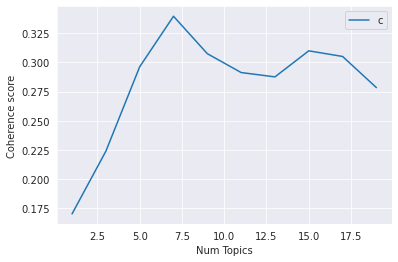

In [ ]:
# Show graph
limit=21; start=1; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.1701
Num Topics = 3  has Coherence Value of 0.2238
Num Topics = 5  has Coherence Value of 0.2962
Num Topics = 7  has Coherence Value of 0.3395
Num Topics = 9  has Coherence Value of 0.3075
Num Topics = 11  has Coherence Value of 0.2913
Num Topics = 13  has Coherence Value of 0.2876
Num Topics = 15  has Coherence Value of 0.3099
Num Topics = 17  has Coherence Value of 0.3051
Num Topics = 19  has Coherence Value of 0.2784


In [ ]:
model_test = LdaModel(corpus, num_topics=23, id2word = dictionary, passes=40,iterations=200, chunksize = 10000, eval_every = None, random_state=0)

In [ ]:
import pyLDAvis.gensim_models as pg
LDAvis_prepared = pg.prepare(model_test, corpus, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13    -0.280778 -0.056549       1        1  6.573554
20    -0.325813 -0.082572       2        1  5.993310
4     -0.115488  0.317921       3        1  5.971287
22    -0.053946 -0.025408       4        1  5.721536
6      0.124397 -0.054480       5        1  5.684265
18     0.101673 -0.051246       6        1  5.243075
2      0.077584 -0.047598       7        1  4.871329
0     -0.147893 -0.123814       8        1  4.566025
16     0.065481 -0.007521       9        1  4.506768
21    -0.081638 -0.064649      10        1  4.480216
19     0.030369 -0.063931      11        1  4.374363
5      0.053360 -0.029602      12        1  3.981795
15    -0.003184 -0.064929      13        1  3.883767
17     0.048541  0.065002      14        1  3.819908
7      0.095750 -0.050748      15        1  3.777854
11    -0.015304  0.329875      16        1  3.737732
1     -0.053665  0.047521      17        1  3.700524
8      0.087308  0.037532      18        1  3.532014
10     0.047111 -0.030088      19        1  3.468417
3      0.052454 -0.012752      20        1  3.282322
12     0.117147 -0.015581      21        1  3.149552
9      0.093740 -0.022256      22        1  2.918117
14     0.082793  0.005870      23        1  2.762269, topic_info=         Term          Freq         Total Category  logprob  loglift
9        data  22102.000000  22102.000000  Default  30.0000  30.0000
5    function  14821.000000  14821.000000  Default  29.0000  29.0000
2       value  16145.000000  16145.000000  Default  28.0000  28.0000
61       plot  13017.000000  13017.000000  Default  27.0000  27.0000
82        row   9804.000000   9804.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
394       top    342.988530    490.126076  Topic23  -4.4398   3.2322
696    double    337.985384    492.324910  Topic23  -4.4545   3.2130
7           r   2084.208684  87093.640001  Topic23  -2.6354  -0.1435
425     error    816.590182  10866.836683  Topic23  -3.5724   1.0008
146       get    491.562446   5385.527613  Topic23  -4.0799   1.1952

[993 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1666     14  0.993196  #124
1146      8  0.731392     0
1146     20  0.267771     0
572      20  0.999171     1
1266     17  0.997431    10
...     ...       ...   ...
1335     11  0.168888  zero
1335     13  0.128411  zero
1335     17  0.178658  zero
473       9  0.994334   zip
1923      5  0.994482     ’

[1158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 21, 5, 23, 7, 19, 3, 1, 17, 22, 20, 6, 16, 18, 8, 12, 2, 9, 11, 4, 13, 10, 15])

In [ ]:
import gensim
tfidf = gensim.models.tfidfmodel.TfidfModel(corpus)
corpus2_tfidf = tfidf[corpus]
d = {dictionary.get(id): value for doc in corpus2_tfidf for id, value in doc}

In [ ]:
# You can get any n key-value pairs though:
list(d.items())[:20]

[('access', 0.41799837558903363),
 ('last', 0.35831828341671196),
 ('value', 0.17358158027061887),
 ('vector', 0.6114491454028069),
 ('explain', 0.575671031784634),
 ('function', 0.2967741547522424),
 ('quantile', 0.49908684173573475),
 ('r', 0.14469966618487887),
 ('count', 0.31886680905696035),
 ('data', 0.16992474342590855),
 ('learn', 0.4290145752110539),
 ('package', 0.23152559267891915),
 ('prior', 0.4768972044724845),
 ('optimization', 0.993424881336716),
 ('think', 0.5663541974984074),
 ('vectors', 0.3647649386761412),
 ('operations', 0.447243200555385),
 ('vectorize', 0.7576650894411667),
 ('compile', 0.4340297293851598),
 ('language', 0.4123459635415588)]